### Spotify Song Suggestor
We would move further using following process:
1.  Importing pre-requisite modules 
2.  Reading the data

3.   Data cleaning: 
 - Involves, Identitfying features
 - Removing misssing and null values
 - Splitting numerical and categorical values

4.  Data Visualisation:
 - Finding the co-relation between the features,
 - Heatmap, ScatterPlot, Histograms

5.  Data Transformation: 
  - Normalising the data

6.  Prediction

7.  Linking to Spotify using spotipy

8.  Recommendation done using random sampling

In [11]:
#importing the files for necessary data read and plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#reading the data
data=pd.read_csv("data.csv/data.csv")

In [13]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [14]:
print(data.shape) #dimensions
print(data.columns) #coloumn features

(169909, 19)
Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


Check if any Null Values are present are not there and here comes DATA CLEANING
 

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window

In [16]:
#checking if there are null values in the features present in the dataset
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [17]:
#to print the details of the dataset such as coloumns, rows, memeory taken and all
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [18]:
#putting the features into a list that are numeric and categorical in two different variables
numeric_features=[feature for feature in data.columns if data[feature].dtype!='O']
print('According to the dataset there are {} numerical values/features : {}'.format(len(numeric_features), numeric_features))

categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('\n And we have {} categorical values/features : {}'.format(len(categorical_features), categorical_features))

According to the dataset there are 15 numerical values/features : ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']

 And we have 4 categorical values/features : ['artists', 'id', 'name', 'release_date']


Removing the categorical values 'axis=1' means 'veritcal rows'

In [19]:
#Storing it in a Dataframe
numeric_table=data.drop(categorical_features,axis=1)
numeric_table

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


In [20]:
#Count number of distinct elements in specified axis. Return Series with number of distinct elements. Can ignore NaN values.
data.nunique()

acousticness          4714
artists              33375
danceability          1232
duration_ms          50212
energy                2332
explicit                 2
id                  169909
instrumentalness      5401
key                     12
liveness              1741
loudness             25313
mode                     2
name                132940
popularity             100
release_date         10882
speechiness           1628
tempo                84548
valence               1739
year                   100
dtype: int64

DATA VISUALISATION

In [21]:
#finding the correlation between different numeric features
correlation = data[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()

<AxesSubplot:>

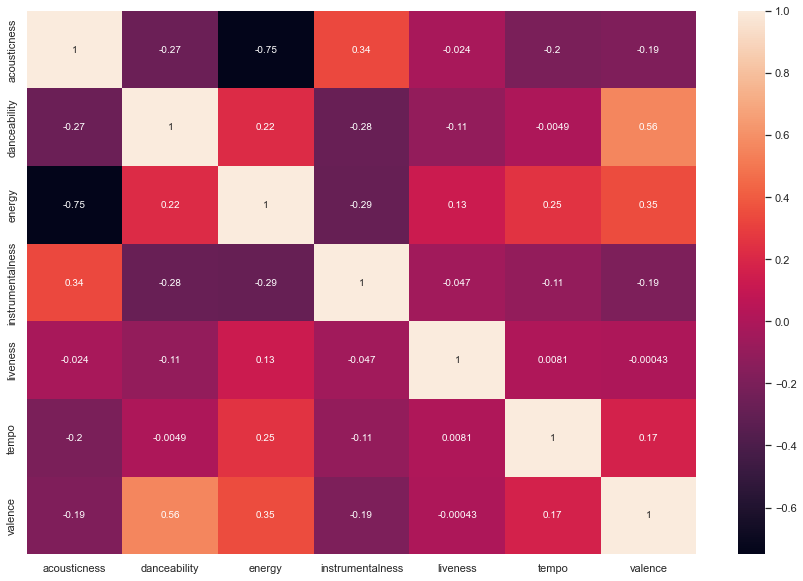

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
#Set the parameters that control the general style of the plots.
sns.set(style='darkgrid')
%matplotlib inline

#size of the figure to be presented
plt.figure(figsize=(15,10))
#heatmap print
sns.heatmap(correlation, annot=True)

Energy and acoustiness appear to be adversely connected.

The valence arousal plane theory states that people are happier when their energy is at a greater valence. Additionally, it has been observed that people are happier when a song's speed is higher.

<AxesSubplot:xlabel='valence', ylabel='energy'>

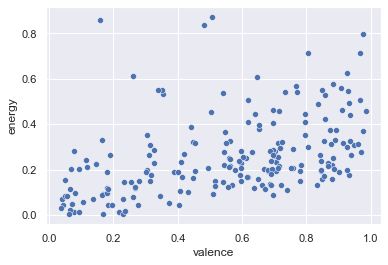

In [23]:
#for scatter plot where x axis is valnce and y is energy and choosing for first 200 points
sns.scatterplot(x='valence',y='energy',data=data.head(200))




<AxesSubplot:xlabel='tempo', ylabel='energy'>

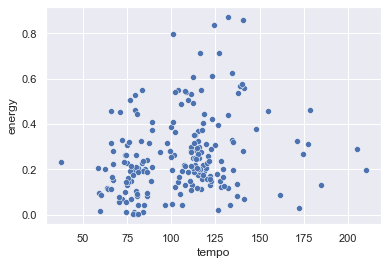

In [24]:

#for scatter plot where x axis is tempo and y is energy and choosing for first 200 points
sns.scatterplot(x='tempo',y='energy',data=data.head(200))


<AxesSubplot:xlabel='valence', ylabel='Count'>

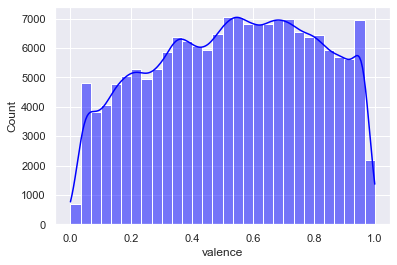

In [25]:

#for histogram plot where x valence and bins are taking 30 pairs
#kde is a bool variable 
# If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.
sns.histplot(data=data,x='valence',bins=30,kde=True,color='blue')


<AxesSubplot:xlabel='energy', ylabel='Count'>

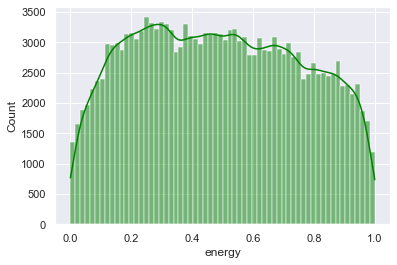

In [16]:

#for histogram plot where x energy
sns.histplot(data=data,x='energy',kde=True,color='green')


<AxesSubplot:xlabel='tempo', ylabel='Count'>

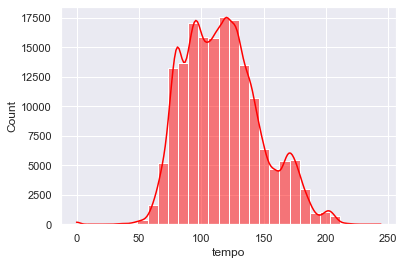

In [26]:

#for histogram plot where x energy
sns.histplot(data=data,x='tempo',bins=30,kde=True,color='red')

We can observe the data and can conclude that the data is pretty balanced and does not need any sort of transformation, but it's a good practise to always go for normalisation, thus normalising it and moving towards the data Transformation

In [27]:
import numpy as np
#taking a variable x that'll be normalised 
#using Z-score normalisation, since the feature distribution does not contain extreme outliers.

def normalize(x):
    Normalised_value = (x - np.mean(x))
    Normalised_value/=np.std(x)
    return Normalised_value

# y contains the normalised value
numeric_table['valence']=normalize(numeric_table['valence'])
numeric_table['energy']=normalize(numeric_table['energy'])
numeric_table['tempo']=normalize(numeric_table['tempo'])
numeric_table['emotional_state']=(numeric_table['tempo']+numeric_table['valence'])/2

<AxesSubplot:xlabel='emotional_state', ylabel='energy'>

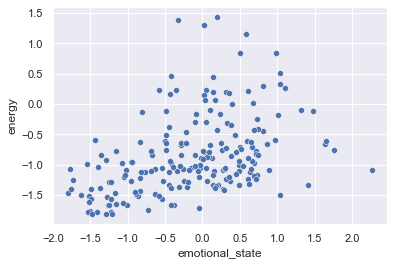

In [28]:
#
sns.scatterplot(x='emotional_state',y='energy',data=numeric_table.head(200))

The data points which are near to 0 depicts happiness, excitment & contentment,
and the data points after 0 will be depictiing sad,nervous,bored and tired out 

so, encoding it according to valence-energy theory

In [29]:
emotions=[]
for datapoint in numeric_table['emotional_state']:
    if datapoint>0:
        emotions.append(1)
    else:
        emotions.append(0)
emotions
numeric_table['emotions']=emotions
numeric_table
 #we have replaced the values that had emotions happiness, excitment & contentment as 0 and rest as 1 using the list stored as 'emotions'

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,emotional_state,emotions
0,0.9950,0.708,158648,-1.097999,0,0.563000,10,0.1510,-12.428,1,0,0.0506,0.049500,0.940924,1928,0.495212,1
1,0.9940,0.379,282133,-1.776785,0,0.901000,8,0.0763,-28.454,1,0,0.0462,-1.073199,-1.735454,1928,-1.404327,0
2,0.6040,0.749,104300,-1.004503,0,0.000000,5,0.1190,-19.924,0,0,0.9290,-0.317996,1.325822,1928,0.503913,1
3,0.9950,0.781,180760,-1.341091,0,0.887000,1,0.1110,-14.734,0,0,0.0926,-0.291114,0.716082,1928,0.212484,1
4,0.9900,0.210,687733,-1.064341,0,0.908000,11,0.0980,-16.829,1,1,0.0424,-1.783425,-1.763655,1928,-1.773540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,-0.170512,1,0.000032,1,0.0891,-7.461,1,75,0.1430,-0.551180,-0.861621,2020,-0.706400,0
169905,0.0167,0.719,167468,-0.387425,0,0.031300,8,0.1110,-10.907,1,64,0.0403,0.359685,-0.998812,2020,-0.319564,0
169906,0.5380,0.514,180700,0.188515,0,0.002330,7,0.1080,-9.332,1,70,0.1050,0.219742,-1.444685,2020,-0.612471,0
169907,0.0714,0.646,167308,1.018766,0,0.000000,1,0.2220,-2.557,1,70,0.0385,0.422041,-0.229015,2020,0.096513,1


<AxesSubplot:xlabel='emotional_state', ylabel='emotions'>

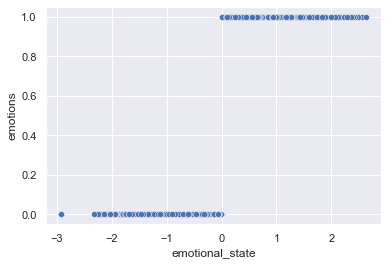

In [30]:
#now we can see that the emotional state is labeled as 1 and 0
sns.scatterplot(x='emotional_state',y='emotions',data=numeric_table)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr=LogisticRegression()
X_train, X_test, y_train, y_test=train_test_split(numeric_table[['valence']],numeric_table.emotions,test_size=0.2,random_state=49)

In [32]:
#now training the algorithm on the training data, after the model is initialized
lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
#testing accuracy 
a=lr.score(X_test,y_test)*100
print(a,"%")

79.19781060561473 %


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#n_esitmators is the number of trees in the forest.
r=RandomForestClassifier(n_estimators=40)
r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [35]:
#accuracry
print(r.score(X_test,y_test)*100,"%")

79.09481490200695 %


### IMPORTING SPOTIFY PLAYLIST from spotipy

In [36]:
#installing spotipy to your enviornment
!pip install spotipy
#importing
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="12496220faa84eb39d6fdd22d53f3599",
                                                           client_secret="bc1f341b8551410c98f12d749c49fd33"))

Top 50 Playlist is reffered for this project


In [37]:
#storing link in a variable
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
#separating the Endpoints and the URI
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

#will store the each track endpoint into a list
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]


In [38]:
#appending the uri and track into the 'l'
l=[]
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    l.append(sp.audio_features(track_uri))

In [39]:
import pandas as pd
b = pd.DataFrame(columns=list(l[0][0].keys()))

# Iterate over each dictionary in the list and append it to 'a'
for d in l:
    b = b.append(d, ignore_index=True)

# Print the concatenated DataFrame
print(b)

C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users

   danceability energy key loudness mode speechiness acousticness  \
0         0.668  0.758   5   -5.176    0      0.0332        0.483   
1         0.707  0.681   0   -4.325    1      0.0668       0.0632   
2         0.812  0.479   2   -5.678    0       0.333        0.213   
3         0.569  0.724   6   -4.076    0      0.0474        0.228   
4          0.72   0.63   4   -3.547    0       0.277        0.673   
5         0.644  0.735   8   -5.747    1      0.0391       0.0521   
6         0.768  0.644   5   -6.671    0       0.136        0.736   
7         0.783  0.592  11   -8.332    0      0.0331        0.435   
8         0.508   0.43   2   -9.475    0      0.0335         0.83   
9         0.696  0.809   5   -8.254    1        0.05        0.252   
10         0.52  0.731   6   -5.338    0      0.0557        0.342   
11        0.784  0.826   7    -6.34    0      0.0538       0.0965   
12        0.575    0.5   1   -7.594    0      0.0707        0.227   
13        0.859  0.658  11    -4.7

C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\HoneyChilliPotato\AppData\Local\Temp\ipykernel_16508\679357006.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)


In [ ]:
Normalising the data from the data frame created from the spotipy module

In [41]:
b['valence']=normalize(b['valence'])
b['energy']=normalize(b['energy'])
b['tempo']=normalize(b['tempo'])
b['emotional_state']=(b['tempo']+b['valence'])/2

b

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,emotional_state
0,0.668,0.832125,5,-5.176,0,0.0332,0.483,0.000019,0.0837,1.367278,0.814816,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,1.091047
1,0.707,0.255405,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.518766,-0.161322,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,0.178722
2,0.812,-1.257549,2,-5.678,0,0.333,0.213,0.000001,0.0756,0.126103,1.528708,audio_features,2UW7JaomAMuX9pZrjVpHAU,spotify:track:2UW7JaomAMuX9pZrjVpHAU,https://api.spotify.com/v1/tracks/2UW7JaomAMuX...,https://api.spotify.com/v1/audio-analysis/2UW7...,234353,4,0.827406
3,0.569,0.577469,6,-4.076,0,0.0474,0.228,0,0.27,0.139643,-1.296656,audio_features,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://api.spotify.com/v1/tracks/6pD0ufEQq0xd...,https://api.spotify.com/v1/audio-analysis/6pD0...,194563,4,-0.578506
4,0.72,-0.126579,4,-3.547,0,0.277,0.673,0,0.0936,0.342745,1.855888,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4,1.099317
5,0.644,0.659858,8,-5.747,1,0.0391,0.0521,0.144,0.161,-0.510281,-1.105855,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,-0.808068
6,0.768,-0.021721,5,-6.671,0,0.136,0.736,0.000837,0.173,-0.004784,-0.908284,audio_features,609E1JCInJncactoMmkDon,spotify:track:609E1JCInJncactoMmkDon,https://api.spotify.com/v1/tracks/609E1JCInJnc...,https://api.spotify.com/v1/audio-analysis/609E...,194543,4,-0.456534
7,0.783,-0.411194,11,-8.332,0,0.0331,0.435,0.000004,0.347,0.879835,-0.095606,audio_features,7FbrGaHYVDmfr7KoLIZnQ7,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,0.392114
8,0.508,-1.624553,2,-9.475,0,0.0335,0.83,0.000441,0.093,-0.934537,0.232225,audio_features,1odExI7RdWc4BT515LTAwj,spotify:track:1odExI7RdWc4BT515LTAwj,https://api.spotify.com/v1/tracks/1odExI7RdWc4...,https://api.spotify.com/v1/audio-analysis/1odE...,212954,4,-0.351156
9,0.696,1.214108,5,-8.254,1,0.05,0.252,0.000128,0.248,1.471085,0.325705,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4,0.898395


In [42]:
b['emotion']=lr.predict(b[['emotional_state']])

c:\Users\HoneyChilliPotato\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- emotional_state
Feature names seen at fit time, yet now missing:
- valence

  warnings.warn(message, FutureWarning)


In [43]:
b

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,emotional_state,emotion
0,0.668,0.832125,5,-5.176,0,0.0332,0.483,0.000019,0.0837,1.367278,0.814816,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,1.091047,1
1,0.707,0.255405,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.518766,-0.161322,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,0.178722,1
2,0.812,-1.257549,2,-5.678,0,0.333,0.213,0.000001,0.0756,0.126103,1.528708,audio_features,2UW7JaomAMuX9pZrjVpHAU,spotify:track:2UW7JaomAMuX9pZrjVpHAU,https://api.spotify.com/v1/tracks/2UW7JaomAMuX...,https://api.spotify.com/v1/audio-analysis/2UW7...,234353,4,0.827406,1
3,0.569,0.577469,6,-4.076,0,0.0474,0.228,0,0.27,0.139643,-1.296656,audio_features,6pD0ufEQq0xdHSsRbg9LBK,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,https://api.spotify.com/v1/tracks/6pD0ufEQq0xd...,https://api.spotify.com/v1/audio-analysis/6pD0...,194563,4,-0.578506,0
4,0.72,-0.126579,4,-3.547,0,0.277,0.673,0,0.0936,0.342745,1.855888,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4,1.099317,1
5,0.644,0.659858,8,-5.747,1,0.0391,0.0521,0.144,0.161,-0.510281,-1.105855,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,-0.808068,0
6,0.768,-0.021721,5,-6.671,0,0.136,0.736,0.000837,0.173,-0.004784,-0.908284,audio_features,609E1JCInJncactoMmkDon,spotify:track:609E1JCInJncactoMmkDon,https://api.spotify.com/v1/tracks/609E1JCInJnc...,https://api.spotify.com/v1/audio-analysis/609E...,194543,4,-0.456534,0
7,0.783,-0.411194,11,-8.332,0,0.0331,0.435,0.000004,0.347,0.879835,-0.095606,audio_features,7FbrGaHYVDmfr7KoLIZnQ7,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,0.392114,1
8,0.508,-1.624553,2,-9.475,0,0.0335,0.83,0.000441,0.093,-0.934537,0.232225,audio_features,1odExI7RdWc4BT515LTAwj,spotify:track:1odExI7RdWc4BT515LTAwj,https://api.spotify.com/v1/tracks/1odExI7RdWc4...,https://api.spotify.com/v1/audio-analysis/1odE...,212954,4,-0.351156,0
9,0.696,1.214108,5,-8.254,1,0.05,0.252,0.000128,0.248,1.471085,0.325705,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4,0.898395,1


We use extract1 and extract 2 to randomly take a single subset sample of data so each time it recommends a different song based on the user's mood.

In [45]:
#extracting
extract1=b[b['emotion']==1]
extract2=b[b['emotion']==0]
#storing a randomly choosen as a sample of size 1
random_row1 = extract1.sample(n=1)
random_row2 = extract2.sample(n=1)

In [48]:
def string(r):
    k=str(r['id'])

    tokens = k.split()

    # extract the second token i.e the one at index 1
    id_string = tokens[1]

    # print the extracted string
    return id_string

track1 = sp.track(string(random_row1))
print("The recommended track is :",track1['name'],"and the \n By - Artist Name:",track1['artists'][0]['name'])

The recommended track is : AMG and the 
 By - Artist Name: Natanael Cano


In [49]:
track2 = sp.track(string(random_row2))
print("The recommended track name:",track2['name'],"and the \n By - Artist Name:",track2['artists'][0]['name'])

The recommended track name: I'm Good (Blue) and the 
 By - Artist Name: David Guetta


In [ ]:
Now the music suggestions are working. We will now continue to build upon it by adding layers and turning it into a web application.